<a href="https://colab.research.google.com/github/DivyaSimhadri1004/projects-/blob/main/tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
base_dir = '/content/drive/My Drive/Two Classes'


In [ ]:
Healthy_dir = os.path.join(base_dir, 'Healthy')
Reject_dir = os.path.join(base_dir, 'Reject')


In [ ]:
print(f"Base directory: {base_dir}")
print(f"Healthy directory: {Healthy_dir}")
print(f"Rejected directory: {Reject_dir}")

Base directory: /content/drive/My Drive/Two Classes
Healthy directory: /content/drive/My Drive/Two Classes/Healthy
Rejected directory: /content/drive/My Drive/Two Classes/Reject


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for data augmentation and normalization
data_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Set 20% of the data for validation
)

# Create training and validation generators
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Set as training data
)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Set as validation data
)


Found 1920 images belonging to 3 classes.
Found 480 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the base model
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
60/60 [==============================] - 127s 2s/step - loss: -6.6933 - accuracy: 0.6656 - val_loss: -12.9302 - val_accuracy: 0.6667
Epoch 2/10
60/60 [==============================] - 74s 1s/step - loss: -19.4296 - accuracy: 0.6667 - val_loss: -25.8987 - val_accuracy: 0.6667
Epoch 3/10
60/60 [==============================] - 68s 1s/step - loss: -32.1739 - accuracy: 0.6667 - val_loss: -38.6158 - val_accuracy: 0.6667
Epoch 4/10
60/60 [==============================] - 77s 1s/step - loss: -44.9368 - accuracy: 0.6667 - val_loss: -51.1121 - val_accuracy: 0.6667
Epoch 5/10
60/60 [==============================] - 81s 1s/step - loss: -58.1194 - accuracy: 0.6667 - val_loss: -63.7827 - val_accuracy: 0.6667
Epoch 6/10
60/60 [==============================] - 79s 1s/step - loss: -71.3342 - accuracy: 0.6667 - val_loss: -76.4862 - val_accuracy: 0.6667
Epoch 7/10
60/60 [==============================] - 85s 1s/step - loss: -84.7064 - accuracy: 0.6667 - val_loss: -89.8792 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')


15/15 [==============================] - 15s 983ms/step - loss: -129.8945 - accuracy: 0.6667
Validation loss: -129.8944549560547
Validation accuracy: 0.6666666865348816


In [ ]:
model.save('/content/drive/My Drive/Two Classes/Two Classifier_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


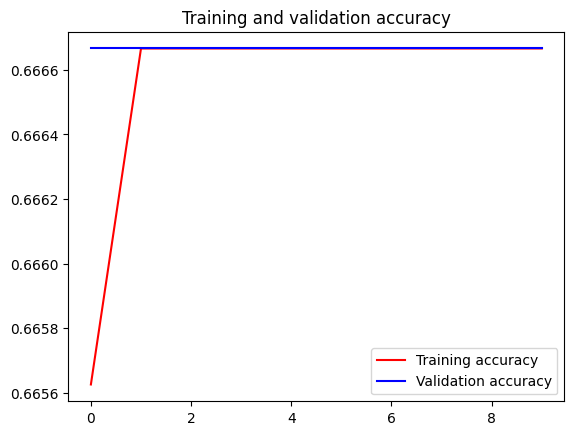

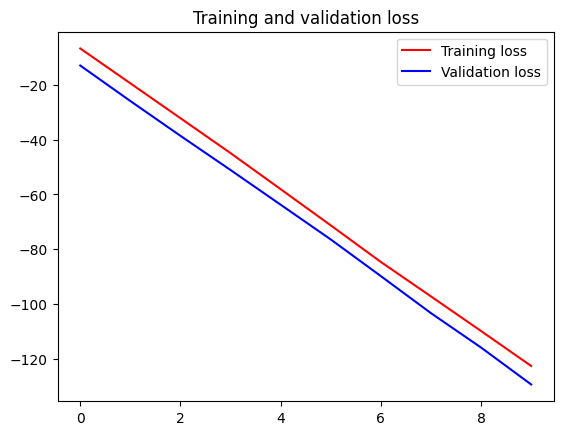

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model_path = '/content/drive/MyDrive/Two Classes/Two Classifier_model.h5'
model = tf.keras.models.load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch dimension
    return img_array / 255.0  # Normalize pixel values

# Path to the new tomato image
new_tomato_image_path = '/content/tomato.jpeg'

# Preprocess the image
processed_image = preprocess_image(new_tomato_image_path)

# Make a prediction
prediction = model.predict(processed_image)

# Interpret the prediction
if prediction > 0.5:
    print("Healthy tomato")
else:
    print("Rejected tomato")


1/1 [==============================] - 1s 1s/step
Healthy tomato


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model_path = '/content/drive/MyDrive/Two Classes/Two Classifier_model.h5'
model = tf.keras.models.load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch dimension
    return img_array / 255.0  # Normalize pixel values

# Path to the new tomato image
new_tomato_image_path = '/content/untomato.jpg'

# Preprocess the image
processed_image = preprocess_image(new_tomato_image_path)

# Make a prediction
prediction = model.predict(processed_image)

# Interpret the prediction
if prediction > 0.5:
    print("Healthy tomato")
else:
    print("Rejected tomato")


1/1 [==============================] - 1s 960ms/step
Healthy tomato


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model_path = '/content/drive/MyDrive/Two Classes/Two Classifier_model.h5'
model = tf.keras.models.load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch dimension
    return img_array / 255.0  # Normalize pixel values

# Path to the new tomato image
new_tomato_image_path = '/content/waste.jpg'

# Preprocess the image
processed_image = preprocess_image(new_tomato_image_path)

# Make a prediction
prediction = model.predict(processed_image)

# Interpret the prediction
if prediction > 0.5:
    print("Healthy tomato")
else:
    print("Rejected tomato")


1/1 [==============================] - 1s 928ms/step
Healthy tomato


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model_path = '/content/drive/MyDrive/Two Classes/Two Classifier_model.h5'
model = tf.keras.models.load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch dimension
    return img_array / 255.0  # Normalize pixel values

# Path to the new tomato image
new_tomato_image_path = '/content/waste.jpg'

# Preprocess the image
processed_image = preprocess_image(new_tomato_image_path)

# Make a prediction
prediction = model.predict(processed_image)

# Interpret the prediction
if prediction > 0.5:
    print("Healthy tomato")
else:
    print("Rejected tomato")


1/1 [==============================] - 2s 2s/step
Healthy tomato


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model_path = '/content/drive/MyDrive/Two Classes/Two Classifier_model.h5'
model = tf.keras.models.load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch dimension
    return img_array / 255.0  # Normalize pixel values

# Path to the new tomato image
new_tomato_image_path = '/content/ripe.jpg'

# Preprocess the image
processed_image = preprocess_image(new_tomato_image_path)

# Make a prediction
prediction = model.predict(processed_image)

# Print the prediction probabilities
print(f"Prediction probabilities: {prediction}")

# Interpret the prediction
if prediction > 0.5:
    print("Healthy tomato")
else:
    print("Rejected tomato")


1/1 [==============================] - 1s 1s/step
Prediction probabilities: [[1.]]
Healthy tomato
